# T test

In this unit, I will provide a simple explanation of what is a t-test. Specifically, how to perform hypothesis testing with a p-value obtained from a t-test. I will talk about the test power and how to interpret the results. This discussion is alsorelated to precision and recall.
In various explanations of a t-test, tutorials often choose to begin
with a real-world application. In my opinion, this can be misleading.
I choose to begin from a simple theoretical framework. Doing so will
explain various implicit assumptions (for example, the existence of
a data generating process) that are neglected in a real application
but necessary in understanding the subject.

Suppose a data generating process where numbers are generated from
a normal distribution. The density of normal is given by:

\begin{align*}
f(x|\mu,\sigma^{2}) & =\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}\right)
\end{align*}

Suppose that $\mu$ ,often referred to as the true mean, equals $1$
and $\sigma^{2}$ , the true variance, is equal to $1$.

In [2]:
import numpy as np
from scipy.stats import t

n = 15
mu = 1
sigma = np.sqrt(1)
np.random.seed(seed=12154)
X = np.random.normal(mu, sigma, n)  #draw 15 numbers from a random dist. with mean = 1 and variance = 1
print(X)

[-0.11976503  1.69133541  2.10420579  0.99091063  1.99561982 -0.77124923
  2.90362901  0.98192434  0.79232235 -0.25324058 -0.87846258 -0.76024629
  0.90918243  2.3521696   1.74099443]


Suppose that I can only see the numbers generated above, but I am interested in learning something about the true data generating process. Let's assume that I am interested in learning something about the true mean, $\mu$. One popular way to learn something about the mean is through hypothesis testing. Specifically, I am interested in testing whether $\mu = 1.5$. I can rewrite this more concretely as:
\begin{align*}
H_{0}: & \mu=1.5\\
H_{1}: & \mu\neq1.5
\end{align*}
From there, I can move to constructing what is known as the t-statistic:
\begin{align*}
t & =\frac{\left(\bar{X}-\tilde{\mu}\right)}{\left(\hat{\sigma}(X)/\sqrt{n}\right)}
\end{align*}
where, $\bar{X}$ is the sample mean of my data, $\tilde{\mu}$ is
my hypothesized true mean, $\hat{\sigma}(X)$ is the standard deviation of
my data, and $n$ is the number of observations (namely, 15). 


In [ ]:
mu_telda = 1.5
tvalue =  (np.mean(X)- mu_telda)/(np.std(X)/np.sqrt(n))
print(tvalue)

To understand the t-statistic and the what follows, imagine the following thought process: I draw 15 numbers from the normal above an infinite number of times. Then, I use the infinite number of t's to draw a dististribution. Mathematically speaking, since the numbers are drawn from normal, the resulting distribution from the infinite t's will be a t-distribution (hence, a t-test) with $n-1$ degrees of freedom. 

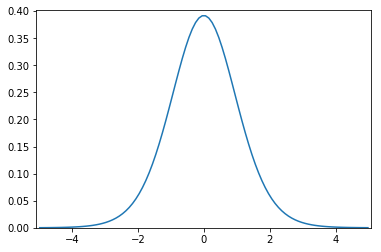

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

dfreedom = n - 1
TDist = t(df=dfreedom, loc=0, scale=1)
x = np.linspace(TDist.ppf(0.0001), TDist.ppf(0.9999), 100) #T-value for percentages between 0% and 100%
y = TDist.pdf(x)

plt.xlim(np.min(x)-.1,np.max(x)+.1)
plt.ylim(0,np.max(y)+.01)
plt.plot(x,y)
plt.margins(x=0, y= 0)